1)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("Boston.csv", index_col= 0)
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Use a correlation and regression test to find which of the variables is the best predictor of NOX(nitric oxides concentration). For that model, provide the regression plot and equation. In generating the line, pick 100 test points equally-spaced from the min to the max of the predictor and use the predict method to obtain the model predictions (as we did in class).

In [7]:
df.corr() #check all possible correlation between columns


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


from this we can see indus is the best variable predictor of nox with a Correlation coefficient of 0.763651


In [8]:
x = df.dis #predictor
y = df.nox #response 
x = sm.add_constant(x)
print(x)

lr_model = sm.OLS(y, x).fit()   
print(lr_model.summary())



     const     dis
1      1.0  4.0900
2      1.0  4.9671
3      1.0  4.9671
4      1.0  6.0622
5      1.0  6.0622
..     ...     ...
502    1.0  2.4786
503    1.0  2.2875
504    1.0  2.1675
505    1.0  2.3889
506    1.0  2.5050

[506 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.23e-100
Time:                        14:42:47   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust

In [20]:
X_prime = np.linspace(x.dis.min(), x.dis.max(), 100)
X_prime = sm.add_constant(X_prime)  # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model.predict(X_prime)


plt.scatter(x.dis, y)  # Plot the raw data
plt.xlabel("dis")
plt.ylabel("nox")
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.8)


AttributeError: 'numpy.ndarray' object has no attribute 'dis'

Do the same to find the best predictor of MEDV (median home value). For that model, provide the regression plot and equation as in the previous part.

In [10]:
df.corr()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


best predicctor for medv is rm with a 0.695 corelation.

In [11]:
x = df.rm #predictor
y = df.medv #response 
x = sm.add_constant(x)
print(x)

lr_model = sm.OLS(y, x).fit()   
print(lr_model.summary())

     const     rm
1      1.0  6.575
2      1.0  6.421
3      1.0  7.185
4      1.0  6.998
5      1.0  7.147
..     ...    ...
502    1.0  6.593
503    1.0  6.120
504    1.0  6.976
505    1.0  6.794
506    1.0  6.030

[506 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.49e-74
Time:                        14:42:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust            

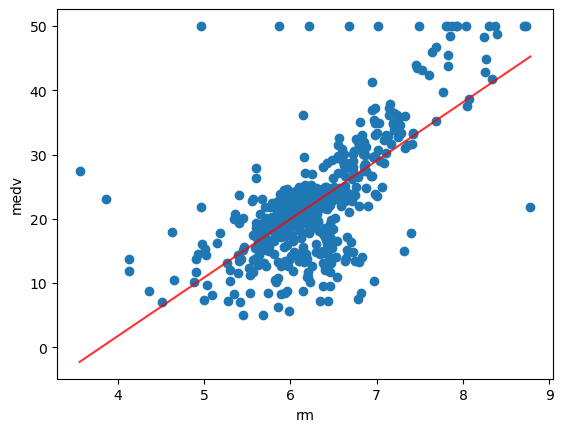

In [12]:
X_prime = np.linspace(x.rm.min(), x.rm.max(), 100)
X_prime = sm.add_constant(X_prime)  # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model.predict(X_prime)


plt.scatter(x.rm, y)  # Plot the raw data
plt.xlabel("rm")
plt.ylabel("medv")
# Add the regression line, colored in red
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.8)

2)

In [13]:
weights = lr_model.params.values
y_hat_manual = np.dot(X_prime, weights)

print(np.allclose(y_hat_manual, y_hat))


True


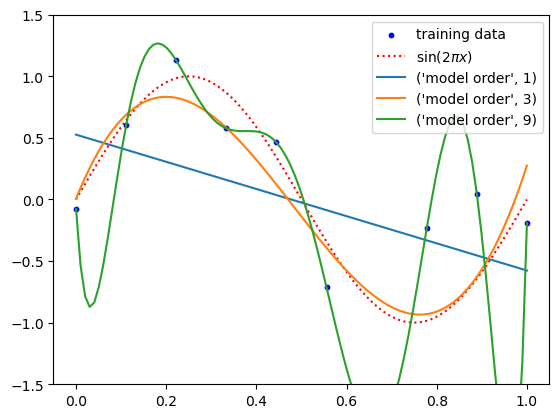

In [14]:
x = np.linspace(0, 1, 10)  # N = 10
# with mean 0 and variance 0.2 from a normal (Gaussian) distribution
#scale is standart diviation must sqrt
y = np.sin(2*np.pi*x) + np.random.normal(loc=0, scale=np.sqrt(0.2), size=x.size)

x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

plt.scatter(x, y, color="b", s=10, label="training data")

plt.plot(x_test, y_test, c="r", linestyle=":", label="$\sin(2\pi x)$")

for i, M in enumerate([1, 3, 9]):
    # Fit a polynomial of order M
    w = np.polyfit(x, y, M)
    p = np.poly1d(w)

    #plt.subplot(1, 3, i+1)
    
    label = ('model order', M)
    # Plot the learned model
    plt.plot(x_test, p(x_test), label=label)
    plt.ylim(-1.5, 1.5)

plt.legend()
plt.show()


In this example a M of 9 result in overfitting, it would perfrom really well on trained data but perform poorly on unseen data. Since the size of the model is 10 and the order is 9 the closer the order gets to the size the more overfitting could be an issue.

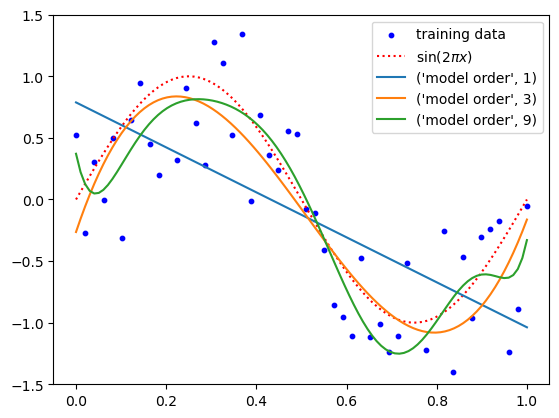

In [15]:
x = np.linspace(0, 1, 50)  # N = 50
# with mean 0 and variance 0.2 from a normal (Gaussian) distribution
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,
                                         scale=np.sqrt(0.2), size=x.size)

x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

plt.scatter(x, y, color="b", s=10, label="training data")

plt.plot(x_test, y_test, c="r", linestyle=":", label="$\sin(2\pi x)$")
p(x_test)

for i, M in enumerate([1, 3, 9]):
    # Fit a polynomial of order M
    w = np.polyfit(x, y, M)
    p = np.poly1d(w)

    #plt.subplot(1, 3, i+1)
    
    label = ('model order', M)
    # Plot the learned model
    plt.plot(x_test, p(x_test), label=label)
    plt.ylim(-1.5, 1.5)
    
plt.legend()
plt.show()


As the training model size(N) gets larger it does not suffer from overfiting as much with the same M of 9.

c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: 

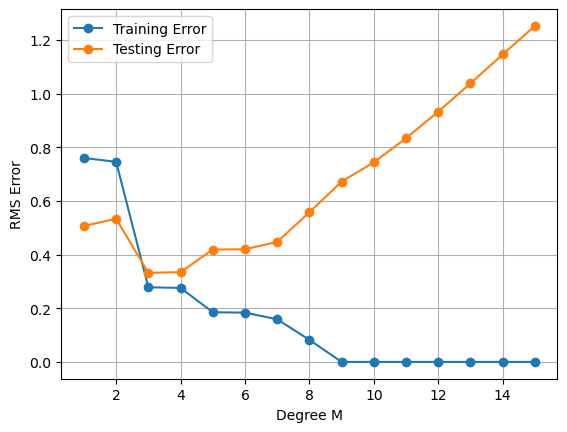

In [16]:
x = np.linspace(0, 1, 10)  # N = 10
# with mean 0 and variance 0.2 from a normal (Gaussian) distribution
y = np.sin(2*np.pi*x) + np.random.normal(loc=0, scale=np.sqrt(0.2), size=x.size)

x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

errors_train = []
errors_test = []

M = np.arange(1, 16)

for degree in M:
# Fit a polynomial of order M
    w = np.polyfit(x, y, degree)
    p = np.poly1d(w)

    E_w_train = 0.5 * np.sum((p(x) - y)**2)
    ERMS_train = np.sqrt((2 * E_w_train)/x.size)

    E_w_test = 0.5 * np.sum((p(x_test) - y_test)**2)
    ERMS_test = np.sqrt((2 * E_w_test)/x_test.size)

    errors_train.append(ERMS_train)
    errors_test.append(ERMS_test)

# Plot the learned model

plt.plot(M, errors_train, label='Training Error', marker='o')
plt.plot(M, errors_test, label='Testing Error', marker='o')
plt.xlabel("Degree M")
plt.ylabel("RMS Error")
plt.grid()
plt.legend()
plt.show()



From this we can see as M increases both the training error and testing error decreases.
But past a certain point increasing M too much leads to overfitting in the testing data so we see the errors increase.

In [17]:
x = np.linspace(0, 1, 10)  # N = 10
y = y = np.sin(2*np.pi*x) + np.random.normal(loc=0,
                                             scale=np.sqrt(0.2), size=x.size)

for M in range(1, 11):
    # Fit a polynomial of order M
    w = np.polyfit(x, y, M)
    print("Optimal weights for M =",M, ":", w)
    print("Max magnitude:", np.max(abs(w)))
    print("Min magnitude:", np.min(abs(w)))

    



Optimal weights for M = 1 : [-1.71148194  0.58427053]
Max magnitude: 1.711481943605358
Min magnitude: 0.5842705326118379
Optimal weights for M = 2 : [-0.8164284  -0.89505355  0.46331818]
Max magnitude: 0.8950535453935036
Min magnitude: 0.46331817732119246
Optimal weights for M = 3 : [ 21.66868936 -33.31946244  11.43737336  -0.28572294]
Max magnitude: 33.31946244485554
Min magnitude: 0.28572293651092884
Optimal weights for M = 4 : [ -9.26812111  40.20493158 -44.87600852  13.72579833  -0.3467476 ]
Max magnitude: 44.87600851928931
Min magnitude: 0.34674760225049583
Optimal weights for M = 5 : [-45.38178866 104.18635053 -58.77592434  -9.85919628   9.52493368
  -0.30063493]
Max magnitude: 104.18635053368459
Min magnitude: 0.300634927701759
Optimal weights for M = 6 : [-4.86533713e+02  1.41421935e+03 -1.53670457e+03  7.90337346e+02
 -2.07139580e+02  2.55155389e+01 -3.60558500e-01]
Max magnitude: 1536.704567148819
Min magnitude: 0.36055849971596876
Optimal weights for M = 7 : [ 1.54918869e+03

c:\Users\husse\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


As the degree increases the magnitude of the weights increaseds as well, because higher dregree polynomials fit the data better. However too larges can lead to overfitting, methods such as regularization helps with this issue.

λ= 0 ERMS_train= 4.500861112252451e-05 ERMS_test= 0.09151786338445034


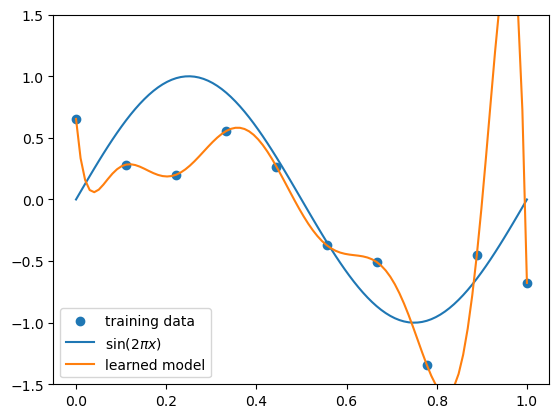

λ= 0.1 ERMS_train= 0.13014199477030913 ERMS_test= 0.060284965089887135


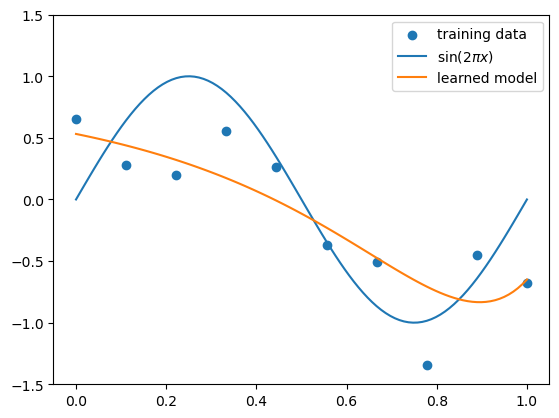

λ= 1 ERMS_train= 0.17107305692055014 ERMS_test= 0.07568874834504109


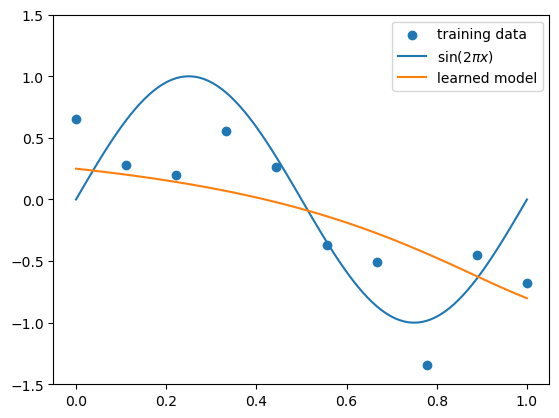

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate training data
x = np.linspace(0, 1, 10)  # N = 10
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,
                                         scale=np.sqrt(0.2), size=x.size)

# Generate test data
x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

# transform to 2D array to use ridge regression
poly = PolynomialFeatures(degree=9)
X = poly.fit_transform(x[:, None])
X_test = poly.transform(x_test[:, None])

lambdas = [0, 0.1, 1]

for i, lambd in enumerate(lambdas):
    # ridge is a L2 regregression where q = 2
    model = Ridge(alpha=lambd, fit_intercept=False)
    model.fit(X, y)  

    #predictions
    y_pred_train = model.predict(X)
    y_pred_test = model.predict(X_test)

    # ERMS
    ERMS_train = np.sqrt(2*mean_squared_error(y, y_pred_train)/y.size)
    ERMS_test = np.sqrt(2*mean_squared_error(y_test, y_pred_test)/y_test.size)

    print("λ=", lambd, "ERMS_train=", ERMS_train, "ERMS_test=", ERMS_test)

   
    plt.figure()
    plt.scatter(x, y, label="training data")
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, y_pred_test, label="learned model")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()



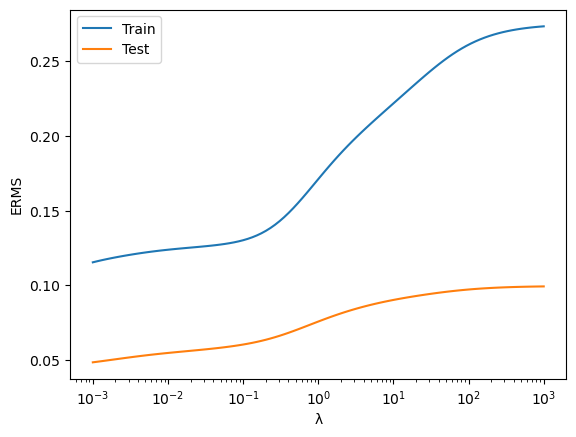

In [19]:
lambdas = np.logspace(-3, 3, 100)  # values of lambdas from 0.001 to 1000

ERMS_train = []
ERMS_test = []

for lambd in lambdas:
    # Fit a Ridge regression model
    model = Ridge(alpha=lambd, fit_intercept=False)
    model.fit(X, y)

    # Compute predictions
    y_pred_train = model.predict(X)
    y_pred_test = model.predict(X_test)

    # Compute ERMS
    ERMS_train.append(np.sqrt(2*mean_squared_error(y, y_pred_train)/len(y)))
    ERMS_test.append(
        np.sqrt(2*mean_squared_error(y_test, y_pred_test)/len(y_test)))

# Plot ERMS as a function of lambda
plt.figure()
plt.plot(lambdas, ERMS_train, label='Train')
plt.plot(lambdas, ERMS_test, label='Test')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('ERMS')
plt.legend()
plt.show()


As shown in the figure above, as Lambda increases the ERMS increases, the model gets simpler and simpler. On the test set ERMS decreases first then increases this is because the regularization got too simple causing underfitting close to a degree of 1.